I think this model should focus on extracting features other than the actual words of the texts.
Stuff to consider may be:

1. sentence length
2. frequency of authors most frequent word
    - requires preprocessing to separate texts by author and figure out the authors favorite words (non stop)
3. word lengths
4. punctuation per sentence?
5. First person use?


In [7]:
import numpy as np
from __future__ import print_function
from keras.utils import to_categorical
from sklearn.metrics import classification_report

def make_labels(data):
    a2c = {'EAP': 0, 'HPL' : 1, 'MWS' : 2}
    labels = np.array([a2c[a] for a in data.author])
    labels = to_categorical(labels)
    return labels

def get_text_only(data):
    return data["text"]

import pandas as pd

# loads the training data
def load_training_data():
    return pd.read_csv("train.csv")

In [8]:
df = load_training_data()
df.head(5)

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [9]:
EAP = df[df.author == "EAP"]
HPL = df[df.author == "HPL"]
MWS = df[df.author == "MWS"]
EAP.head(5)

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
6,id09674,"The astronomer, perhaps, at this point, took r...",EAP
7,id13515,The surcingle hung in ribands from my body.,EAP
8,id19322,I knew that you could not say to yourself 'ste...,EAP


In [11]:
def plot_hist(data, xlim=100, binwidth=1):
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))
    plt.xlim(0, xlim)
    plt.ylabel("Frequency")

55


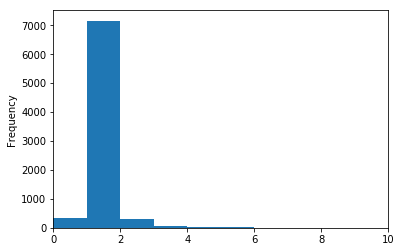

In [50]:
EAP_sent_counts = [row.count('.') for row in EAP["text"]]
print(max(EAP_sent_counts))

plot_hist(EAP_sent_counts, xlim=10)

12


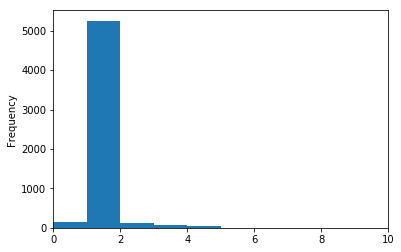

In [51]:
HPL_sent_counts = [row.count('.') for row in HPL["text"]]
print(max(HPL_sent_counts))

plot_hist(HPL_sent_counts, xlim=10)

4


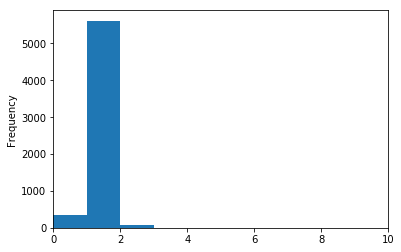

In [52]:
MWS_sent_counts = [row.count('.') for row in MWS["text"]]
print(max(MWS_sent_counts))

plot_hist(MWS_sent_counts, xlim=10)

MWS seems to have fewer "sentences" per text than the others

In [53]:
from keras.preprocessing.text import text_to_word_sequence

def convert_to_word_sequence(text):
    return [text_to_word_sequence(words) for words in text]

# input: a string
# output: the average number of words between each period (average sentence length)
def text_to_sentence_word_length(text):
    sentences = text.split(".")
    lengths = [len(text_to_word_sequence(sentence)) for sentence in sentences]
    return np.mean(lengths)

print(text_to_sentence_word_length("This is a test sentence. How many sentences are there in here. I bet its three"))

5.33333333333


EAP Sentence Length in Words


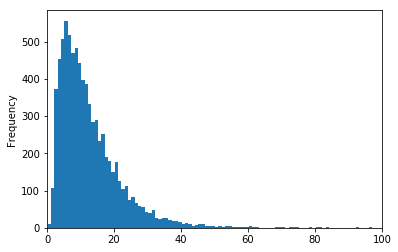

In [60]:
EAP_sent_word_lengths = [text_to_sentence_word_length(text) for text in EAP["text"]]
print("EAP Sentence Length in Words")
plot_hist(EAP_sent_word_lengths, xlim=100)

HPL Sentence Length in Words


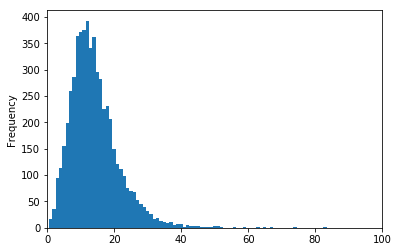

In [61]:
HPL_sent_word_lengths = [text_to_sentence_word_length(text) for text in HPL["text"]]
print("HPL Sentence Length in Words")
plot_hist(HPL_sent_word_lengths, xlim=100)

MWS Sentence Length in Words


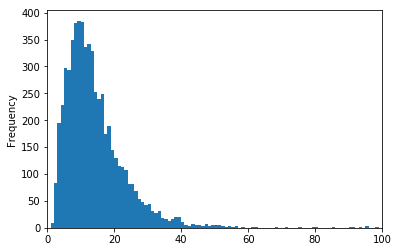

In [62]:
MWS_sent_word_lengths = [text_to_sentence_word_length(text) for text in MWS["text"]]
print("MWS Sentence Length in Words")
plot_hist(MWS_sent_word_lengths, xlim=100)

In [14]:
def get_average_sentence_length_in_char(text):
    sentences = text.split(".")
    alnum_sentences = ["".join([ch for ch in sentence if ch.isalnum()]) for sentence in sentences]
    lengths = [len(sentence) for sentence in alnum_sentences if len(sentence) is not 0]
    return lengths

EAP Sentence Lengths in Words
1235


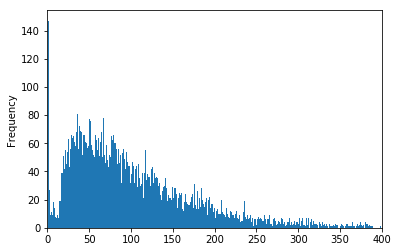

In [15]:
EAP_sent_char_length = []
for text in EAP["text"]:
    EAP_sent_char_length = EAP_sent_char_length + get_average_sentence_length_in_char(text)
print("EAP Sentence Lengths in Words")
print(max(EAP_sent_char_length))
plot_hist(EAP_sent_char_length, xlim=400)

HPL Sentence Lengths in Words
732


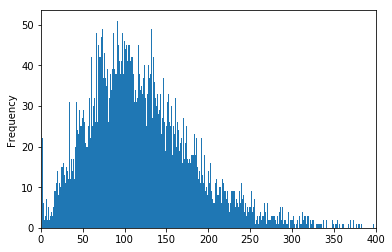

In [17]:
HPL_sent_char_length = []
for text in HPL["text"]:
    HPL_sent_char_length = HPL_sent_char_length + get_average_sentence_length_in_char(text)
print("HPL Sentence Lengths in Words")
print(max(HPL_sent_char_length))
plot_hist(HPL_sent_char_length, xlim=400)

MWS Sentence Lengths in Words
3789


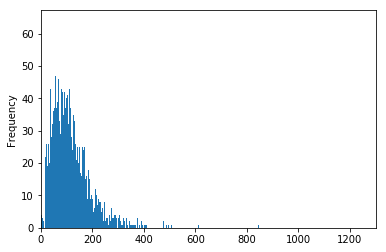

In [18]:
MWS_sent_char_length = []
for text in MWS["text"]:
    MWS_sent_char_length = MWS_sent_char_length + get_average_sentence_length_in_char(text)
print("MWS Sentence Lengths in Words")
print(max(MWS_sent_char_length))
plot_hist(MWS_sent_char_length, xlim=1300)

EAP seems to have quite a few shorter sentences

In [5]:
def get_word_lengths(text):
    text = "".join([ch for ch in text if ch.isalnum() or ch == " "])
    words = text.split(" ")
    lengths = [len(word) for word in words]
    return lengths

s = "the sentence is made of words, what are the words lengths"
print(get_word_lengths(s))

[3, 8, 2, 4, 2, 5, 4, 3, 3, 5, 7]


EAP Word Lengths
19


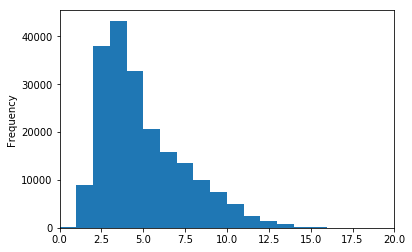

In [13]:
EAP_word_lengths = []
for text in EAP["text"]:
    EAP_word_lengths = EAP_word_lengths + get_word_lengths(text)
print("EAP Word Lengths")
print(max(EAP_word_lengths))
plot_hist(EAP_word_lengths, xlim=20)

HPL Word Lengths
18


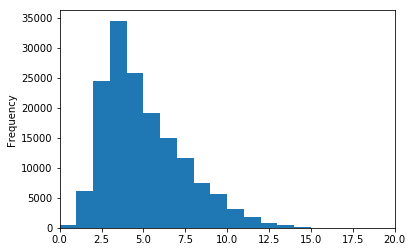

In [14]:
HPL_word_lengths = []
for text in HPL["text"]:
    HPL_word_lengths = HPL_word_lengths + get_word_lengths(text)
print("HPL Word Lengths")
print(max(HPL_word_lengths))
plot_hist(HPL_word_lengths, xlim=20)

MWS Word Lengths
18


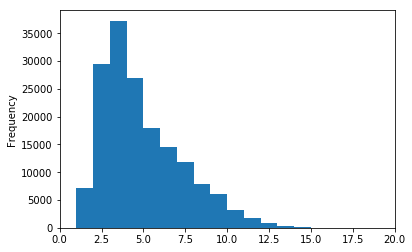

In [15]:
MWS_word_lengths = []
for text in MWS["text"]:
    MWS_word_lengths = MWS_word_lengths + get_word_lengths(text)
print("MWS Word Lengths")
print(max(MWS_word_lengths))
plot_hist(MWS_word_lengths, xlim=20)

There doesn't seem to be much difference in the length of words the authors use, probably not a great feature to use

In [21]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(lower=True, split=" ", char_level=False)
tokenizer.fit_on_texts(df["text"]);

def is_in_first_person(text):
    first_person_words = [
        "i",
        "we",
        "me",
        "mine",
        "my",
        "us",
        "our",
        "ours"
    ]
    first_person_indices = [tokenizer.word_index[word] for word in first_person_words]
    seq = tokenizer.texts_to_sequences([text])[0]
    return bool(set(first_person_indices) & set(seq))

print(is_in_first_person("I am a person, we are persons"))
print(is_in_first_person("The dog is small"))
print(is_in_first_person("what is yours is mine"))

True
False
True
